## A walkthrough of how to use PyPhi in an interactive Jupyter session

Modified from https://pyphi.readthedocs.io/en/latest/examples/index.html  (using the `SageMath 9.4` kernel)


```
> sage pip install pyphi
```

See also the repository https://github.com/arvidl/sagemath-examples

----------

For the `pyphi-explore` conda environmnet see `00-basic-usage.ipynb`and the `environment_pyphi.yaml` file:


```
## Guidelines for the environmnet

# Creating environment
# conda env create -f environment_pyphi.yml

# Activating the environment
# conda activate pyphi-explore

# To make a PYPHI-EXPLORE kernel:
# python -m ipykernel install --user --name pyphi-explore --display-name "PYPHI-EXPLORE"

# To update the pyphi-explore conda environment:
# conda env update -f environment_pyphi.yml

# To remove and reinstall the pyphi-explore environment (if installation problems):
# conda deactivate
# conda env remove -n pyphi-explore

# Recreating the environment
# conda env create -f environment_pyphi.yml
```

See also 
- http://integratedinformationtheory.org/calculate.html
- https://github.com/ELIFE-ASU/pyphi-spectrum (a wrapper for PyPhi that can be used to calculate all possible Phi values for a given subsystem)

### Some background and concepts in IIT

[Tonini](https://en.wikipedia.org/wiki/Giulio_Tononi), Giulio. _An information integration theory of consciousness_. BMC Neuroscience 2004;5(42) [[link](https://bmcneurosci.biomedcentral.com/articles/10.1186/1471-2202-5-42)]

Consciousness poses two main problems. The first is understanding the conditions that determine to what extent a system has conscious experience. For instance, why is our consciousness generated by certain parts of our brain, such as the thalamocortical system, and not by other parts, such as the cerebellum? And why are we conscious during wakefulness and much less so during dreamless sleep? The second problem is understanding the conditions that determine what kind of consciousness a system has. For example, why do specific parts of the brain contribute specific qualities to our conscious experience, such as vision and audition?

This paper presents a theory about what consciousness is and how it can be measured. According to the theory, _consciousness corresponds to the capacity of a system to integrate information_. This claim is motivated by two key phenomenological properties of consciousness: _differentiation_ – the availability of a very large number of conscious experiences; and _integration_ – the unity of each such experience. The theory states that _the quantity of consciousness available to a system can be measured as the Φ value of a complex of elements_. Φ is the amount of causally effective information that can be integrated across the informational weakest link of a subset of elements. A _complex_ is a subset of elements with Φ>0 that is not part of a subset of higher Φ. The theory also claims that the quality of consciousness is determined by the informational relationships among the elements of a complex, which are specified by the values of effective information among them. Finally, each particular conscious experience is specified by the value, at any given time, of the variables mediating informational interactions among the elements of a complex.


Tonini, Giulio and [Sporns](https://en.wikipedia.org/wiki/Olaf_Sporns), Olaf. _Measuring information integration_. BMC Neuroscience 2003;4(31) [[link](https://bmcneurosci.biomedcentral.com/articles/10.1186/1471-2202-4-31)]


Sporns, Olaf;  Tononi, Giulio;  [Edelman](https://en.wikipedia.org/wiki/Gerald_Edelman), Gerald M. _Theoretical Neuroanatomy: Relating Anatomical and Functional Connectivity in Graphs and Cortical Connection Matrices_. Cerebral Cortex 2000;10(2):127–141 [[link](https://academic.oup.com/cercor/article/10/2/127/318777)]



![img](https://upload.wikimedia.org/wikipedia/commons/8/8a/Axioms_and_postulates_of_integrated_information_theory.jpg)

In [5]:
import pyphi
import numpy as np

We have done `WELCOME_OFF: true` in our `pyphi_config.yml`, otherwise we will see:

```
Welcome to PyPhi!

If you use PyPhi in your research, please cite the paper:

  Mayner WGP, Marshall W, Albantakis L, Findlay G, Marchman R, Tononi G.
  (2018). PyPhi: A toolbox for integrated information theory.
  PLOS Computational Biology 14(7): e1006343.
  https://doi.org/10.1371/journal.pcbi.1006343

Documentation is available online (or with the built-in `help()` function):
  https://pyphi.readthedocs.io

To report issues, please use the issue tracker on the GitHub repository:
  https://github.com/wmayner/pyphi

For general discussion, you are welcome to join the pyphi-users group:
  https://groups.google.com/forum/#!forum/pyphi-users

To suppress this message, either:
  - Set `WELCOME_OFF: true` in your `pyphi_config.yml` file, or
  - Set the environment variable PYPHI_WELCOME_OFF to any value in your shell:
        export PYPHI_WELCOME_OFF='yes'
```

#### The transition probability matrix (tpm)

See also: Generating Markov transition matrix in Python [[stackoverflow](https://stackoverflow.com/questions/46657221/generating-markov-transition-matrix-in-python/46657489)]

The TPM in the figure is given in state-by-state form; there is a row and a column for each state. However, in PyPhi, we use a more compact representation: state-by-node form, in which there is a row for each state, but a column for each node. The $(i,j)^{th}$ entry gives the probability that the $j^{th}$ node is ON in the $i^{th}$ state. For more information on how TPMs are represented in PyPhi, see [Transition probability matrix conventions](https://pyphi.readthedocs.io/en/latest/conventions.html#tpm-conventions).
 
![img](https://journals.plos.org/ploscompbiol/article/figure/image?size=large&id=10.1371/journal.pcbi.1006343.g002)

In [6]:
tpm = np.array([
[0, 0, 0],
[0, 0, 1],
[1, 0, 1],
[1, 0, 0],
[1, 1, 0],
[1, 1, 1],
[1, 1, 1],
[1, 1, 0]
])

**SageMath: Hidden Markov Models**

[This](https://doc.sagemath.org/html/en/reference/stats/sage/stats/hmm/hmm.html) is a complete pure-Cython optimized implementation of Hidden Markov Models. It fully supports Discrete, Gaussian, and Mixed Gaussian emissions.

The best references for the basic HMM algorithms implemented here are:

- Tapas Kanungo’s “Hidden Markov Models” [[pdf](https://www.kornai.com/EFS/OnlineSupportMaterial/Kanungo/hmmtalk.pdf)]

- Jackson’s HMM tutorial:
http://personal.ee.surrey.ac.uk/Personal/P.Jackson/tutorial/

In [12]:
m = hmm.DiscreteHiddenMarkovModel([[0.4,0.6],[0.1,0.9]], [[0.1,0.9],[0.5,0.5]], [.5,.5])
m

Discrete Hidden Markov Model with 2 States and 2 Emissions
Transition matrix:
[0.4 0.6]
[0.1 0.9]
Emission matrix:
[0.1 0.9]
[0.5 0.5]
Initial probabilities: [0.5000, 0.5000]

In [13]:
m.sample(5)

[1, 1, 1, 1, 0]

The _connectivity matrix_ is a square matrix such that the $(i,j)^{th}$
entry is $1$ if there is a connection from node $i$ to node $j$, and $0$ otherwise.

For more information on how CMs are represented in PyPhi, see [Connectivity matrix conventions conventions](https://pyphi.readthedocs.io/en/latest/conventions.html#connectivity-matrix-conventions).

In [7]:
cm = np.array([
[0, 0, 1],
[1, 0, 1],
[1, 1, 0]
])

Making _labels_ for the network nodes so that PyPhi’s output is easier to read

In [8]:
labels = ('A', 'B', 'C')

Usign `DiGraph` (directed graphs) from SageMath, this module implements functions and operations involving directed graphs - [here](https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/digraph.html#) is what they can do.

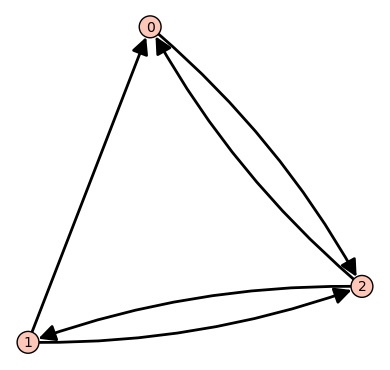

In [11]:
G = DiGraph(matrix(cm))
G.show()

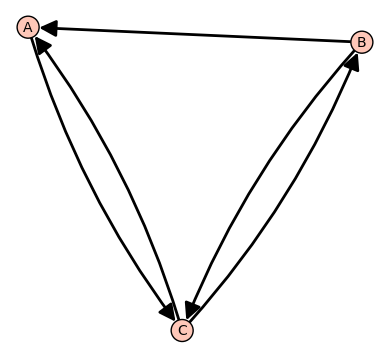

In [3]:
D = DiGraph({'A':['C'], 'B':['A','C'], 'C':['A', 'B']})
D.show()

Construct the network itself with the arguments just created:

In [5]:
network = pyphi.Network(tpm, cm=cm, node_labels=labels)

The next step is to define a subsystem for which we want to evaluate Φ. To make a subsystem, we need the network that it belongs to, the state of that network, and the indices of the subset of nodes which should be included.

The state should be an $n$-tuple, where $n$ is the number of nodes in the network, and where the $i^{th}$ element is the state of the $i^{th}$ node in the network.

In [6]:
state = (1, 0, 0)

In this case, we want the Φ of the entire network, so we simply include every node in the network in our subsystem:

In [8]:
node_indices = (0, 1, 2)

In [9]:
subsystem = pyphi.Subsystem(network, state, node_indices)

If you do not explicitly provide node indices to a Subsystem the system will, by default, cover the entire network. For example, the following is equivalent to the above definition of subsystem:

In [10]:
# subsystem = pyphi.Subsystem(network, state)

Node labels can be used instead of indices when constructing a Subsystem:

In [11]:
# pyphi.Subsystem(network, state, ('B', 'C'))

Now we use the [phi()](https://pyphi.readthedocs.io/en/latest/api/compute.subsystem.html#pyphi.compute.subsystem.phi) function to compute the Φ of our subsystem:

In [12]:
%%time
pyphi.compute.phi(subsystem)

CPU times: user 105 ms, sys: 253 ms, total: 358 ms
Wall time: 4.35 s


2.3125

f we want to take a deeper look at the integrated-information-theoretic properties of our network, we can access all the intermediate quantities and structures that are calculated in the course of arriving at a final Φ value by using sia(). This returns a nested object, SystemIrreducibilityAnalysis, that contains data about the subsystem’s cause-effect structure, cause and effect repertoires, etc.

In [13]:
%%time
sia = pyphi.compute.sia(subsystem)

CPU times: user 104 ms, sys: 251 ms, total: 356 ms
Wall time: 4.34 s


For instance, we can see that this network has 4 concepts:

In [14]:
len(sia.ces)

4

See the documentation for [`SystemIrreducibilityAnalysis`](https://pyphi.readthedocs.io/en/latest/api/models.subsystem.html#pyphi.models.subsystem.SystemIrreducibilityAnalysis) and Concept for more information on these objects.

The network and subsystem discussed here are returned by the [`pyphi.examples.basic_network()`](https://pyphi.readthedocs.io/en/latest/api/examples.html#pyphi.examples.basic_network) and [`pyphi.examples.basic_subsystem()`](https://pyphi.readthedocs.io/en/latest/api/examples.html#pyphi.examples.basic_subsystem) functions.